In [10]:
import pandas as pd

from project.survey.survey import SurveyReader
from project.constants import DATA_DIR, STUDY_YEARS


survey = SurveyReader(DATA_DIR, include_years=STUDY_YEARS)
survey.read_files()


internet_access_qs = [
    "P314A",  # Used internet in the last month
    "P314B$1",  # Used internet at home
    "P314B$2",  # Used internet at work
    "P314B$3",  # Used internet in school
    "P314B$4",  # Used internet in telecenter
    "P314B$5",  # Used internet in someone else's house'
    # "P314B$6",  # 2015+  Used internet "other"
    # "P314B$7",  # 2016+  Used internet in cell phone
    # "P314B1_1",  # 2016+  Used internet in Desktop computer
    # "P314B1_2",  # 2016+  Used internet in Laptop
    # "P314B1_6",  # 2016+  Used internet in tablet
    # "P314B1_7",  # 2016+  Used internet 'other'
    # "P314B1_8",  # 2019+  Used internet No data plan
    # "P314B1_9",  # 2019+  Used internet with data plan
    "P314D",  # Internet use frequency, 
    "P3151",  # Used internet in telecenter: Paid
    "P3152",  # Used internet in telecenter: auto provided
    "P3153",  # Used internet in telecenter: Paid with goods
    "P3154",  # Used internet in telecenter: Other homes
    "P3155",  # Used internet in telecenter: Social program
    "P3156",  # Used internet in telecenter: Other
]


In [11]:
# We want module 01 to filter only completed surveys
q_names_01 = ["RESULT"]
module_01 = survey.data_columns("01", q_names_01, include_demographics=False)


In [12]:
  # Used internet in telecenter: Paidinternet_qs = survey.data_columns("03", q_names)
module_03 = survey.data_columns("03", internet_access_qs)
internet_qs = pd.merge(module_03, module_01, on=["HOUSE_KEY"], how="left")

# Merge with module 1 that allows us to filter only the survey answers
# that have been completed `RESULT == 1`
internet_qs = internet_qs[internet_qs["RESULT"] == 1]

unique_person = len(module_03["PERSON_KEY"].unique())
unique_house = len(module_03["HOUSE_KEY"].unique())
print(f"Total houses\t\t {unique_house}")
print(f"Total individuals:\t{unique_person}")

Total houses		 33886
Total individuals:	108354


In [13]:
internet_qs["uses_telecenter"] = (internet_qs["P314B$4"] == 4) & (internet_qs["P314A"] == 1)
internet_qs["uses_telecenter"] = internet_qs["uses_telecenter"].astype(int)
internet_qs["home_internet"] = internet_qs["P314B$1"] == 1
internet_qs["internet_elsewhere"] = (internet_qs["P314B$2"] == 1) | (internet_qs["P314B$3"] == 1) | (internet_qs["P314B$5"] == 1)
print(len(internet_qs["P314B$4"] == 4))

90498


In [14]:
uses_telecenters = internet_qs[internet_qs["uses_telecenter"] == 1]
print(len(internet_qs[internet_qs["uses_telecenter"] == 1]))
print(100*len(internet_qs[internet_qs["uses_telecenter"] == 1])/len(internet_qs))

501
0.5536033945501558


In [15]:
value_labels = survey.value_labels("01", ["DOMINIO"])["DOMINIO"]
value_labels

{1.0: 'Costa Norte',
 2.0: 'Costa Centro',
 3.0: 'Costa Sur',
 4.0: 'Sierra Norte',
 5.0: 'Sierra Centro',
 6.0: 'Sierra Sur',
 7.0: 'Selva',
 8.0: 'Lima Metropolitana'}

In [16]:
counts = uses_telecenters['DOMINIO'].value_counts().reset_index(name='count')
counts = counts.sort_values("DOMINIO")
counts

,DOMINIO,count
4,1.0,35
5,2.0,33
3,3.0,50
7,4.0,9
0,5.0,136
2,6.0,99
1,7.0,113
6,8.0,26


In [17]:
value_labels = survey.value_labels("01", ["DOMINIO"])["DOMINIO"]
value_labels

{1.0: 'Costa Norte',
 2.0: 'Costa Centro',
 3.0: 'Costa Sur',
 4.0: 'Sierra Norte',
 5.0: 'Sierra Centro',
 6.0: 'Sierra Sur',
 7.0: 'Selva',
 8.0: 'Lima Metropolitana'}

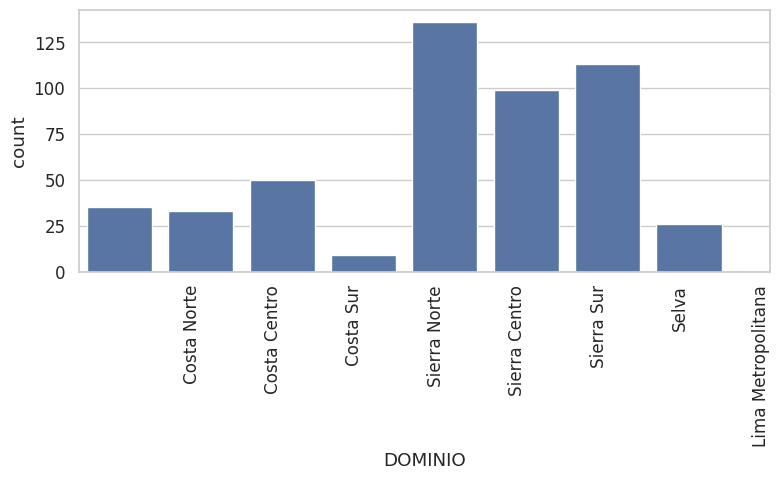

In [18]:
import seaborn as sns
from matplotlib import pyplot as plt

sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.barplot(counts, x="DOMINIO", y="count")
plt.xticks(rotation=90, ha='right')
plt.xticks(counts['DOMINIO'], [value_labels[x] for x in counts['DOMINIO']])
plt.tight_layout()
plt.show()